<a href="https://colab.research.google.com/github/hyeji-K/AI_example/blob/main/project_hj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/생성AI_1회차/goorm_study/project1/dataset/

/content/drive/.shortcut-targets-by-id/1Cx42c2qg_InRX8W-YBTC-BfVyE6mBZoK/goorm_study/project1/dataset


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### **1. 데이터 탐색**

In [ ]:
pitching_df = pd.read_csv('kbopitchingdata.csv')
# batting_df = pd.read_csv('kbobattingdata.csv')

In [ ]:
pitching_df.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [ ]:
pitching_df.info() # null 값 및 date type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

In [ ]:
# pitching_df.filter(items=['year', 'team', 'ERA', 'run_average_9', 'innings_pitched', 'WHIP', 'hits_9', 'walks_9', 'strikeouts_9', 'homeruns_9'])

,year,team,ERA,run_average_9,innings_pitched,WHIP,hits_9,walks_9,strikeouts_9,homeruns_9
0,2021,LG Twins,3.57,3.96,1264.1,1.312,8.0,3.9,7.6,0.6
1,2021,KT Wiz,3.67,4.17,1255.0,1.316,8.4,3.5,7.5,0.6
2,2021,Doosan Bears,4.28,4.66,1260.1,1.487,9.2,4.2,7.4,0.7
3,2021,Samsung Lions,4.29,4.70,1250.0,1.450,9.3,3.8,7.4,0.9
4,2021,NC Dinos,4.50,4.95,1247.2,1.476,9.1,4.2,7.5,0.9
...,...,...,...,...,...,...,...,...,...,...
318,1982,OB Bears,3.19,3.95,725.1,1.260,7.8,3.6,3.9,0.5
319,1982,MBC Blue Dragons,3.51,4.45,708.1,1.298,8.4,3.3,5.0,0.7
320,1982,Lotte Giants,3.95,4.86,713.2,1.435,9.6,3.3,4.6,0.9
321,1982,Haitai Tigers,3.76,4.93,707.9,1.403,8.9,3.8,4.4,0.6


In [ ]:
pitching_df.shape

(323, 34)

In [ ]:
pitching_df['team'].value_counts()

,count
team,
Samsung Lions,40
Lotte Giants,40
LG Twins,32
Hanwha Eagles,28
Doosan Bears,23
Kia Tigers,21
SK Wyverns,21
Haitai Tigers,19
OB Bears,17


In [ ]:
# null 값이 존재하는 데이터는 삭제 (중요한 칼럼이라고 생각하지 않았음)
drop_col = ['games_started', 'games_finished', 'intentional_walks', 'balks', 'wild_pitches']
pitching_df.drop(drop_col, axis=1, inplace=True)

#### 상관계수 그래프 그리기
- 상관계수란 두 변수 간의 관계가 얼마나 밀접한지를 나타냅니다
- 값은 -1에서 1 사이로 나옵니다
- 1에 가까울수록 두 변수는 강한 양의 상관관계를 가집니다. 즉, 한 변수가 증가하면 다른 변수도 증가합니다.
- -1에 가까울수록 두 변수는 강한 음의 상관관계를 가집니다. 즉, 한 변수가 증가하면 다른 변수는 감소합니다.
- 0에 가까울수록 두 변수 간에는 거의 상관관계가 없다는 의미입니다.

In [ ]:
# 상관계수 그래프를 그리기 위해 object 타입 변수 삭제
pitching_df.drop(['team'], axis=1,inplace=True)

<Axes: >

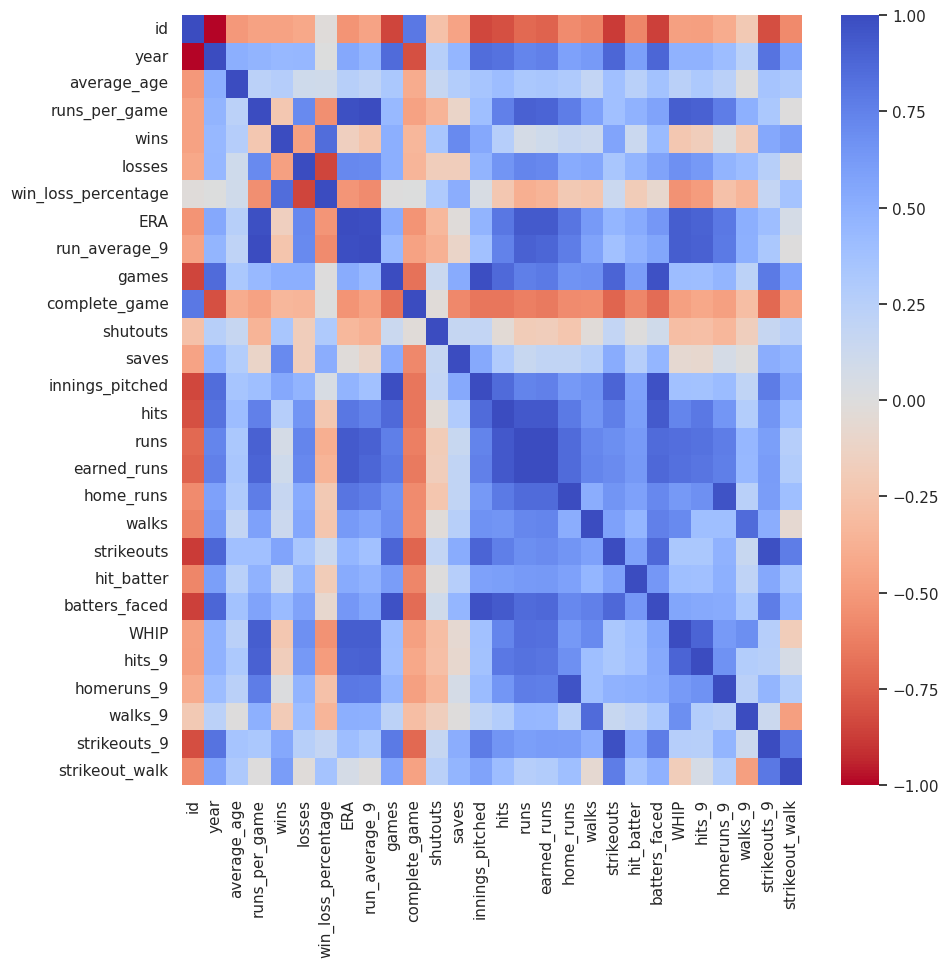

In [ ]:
plt.figure(figsize=(10, 10)) # 새로운 그래프 생성, 플롯 크기 조절
corr = pitching_df.corr() # 상관계수
sns.heatmap(corr, cmap='coolwarm_r', annot=False, vmax=1, vmin=-1)

In [ ]:
corr['win_loss_percentage'][abs(corr['win_loss_percentage'])>=0.25]

,win_loss_percentage
runs_per_game,-0.554328
wins,0.848670
losses,-0.847226
win_loss_percentage,1.000000
ERA,-0.520309
run_average_9,-0.565047
shutouts,0.297050
saves,0.509287
runs,-0.383175
earned_runs,-0.355526


# 전처리된 데이터 이용하여 모델 학습

- Feature
    - `team`, `runs_per_game`, `ERA`, `WHIP`, `strikeouts_9`, `hits_9`, `walks_9`, `homeruns_9`, `run_average_9`, `shutouts`, `saves`, `runs`, `earned_runs`, `strikeout_walk`
- target
    - `win_loss_percentage`

In [5]:
pitching_df = pd.read_csv('data.csv')

In [17]:
pitching_df.head(10)

,ERA,win_loss_percentage,runs_per_game,WHIP,strikeouts_9,walks_9,hits_9,homeruns_9,run_average_9,shutouts,...,team_Doosan Bears,team_Hanwha Eagles,team_KT Wiz,team_Kia Tigers,team_Kiwoom Heroes,team_LG Twins,team_Lotte Giants,team_NC Dinos,team_SSG Landers,team_Samsung Lions
0,3.57,0.558,3.90,1.312,7.6,3.9,8.0,0.6,3.96,18,...,0,0,0,0,0,1,0,0,0,0
1,3.67,0.560,4.06,1.316,7.5,3.5,8.4,0.6,4.17,6,...,0,0,1,0,0,0,0,0,0,0
2,4.28,0.519,4.57,1.487,7.4,4.2,9.2,0.7,4.66,10,...,1,0,0,0,0,0,0,0,0,0
3,4.29,0.560,4.57,1.450,7.4,3.8,9.3,0.9,4.70,14,...,0,0,0,0,0,0,0,0,0,1
4,4.50,0.500,4.80,1.476,7.5,4.2,9.1,0.9,4.95,10,...,0,0,0,0,0,0,0,1,0,0
5,4.33,0.507,4.89,1.469,6.4,4.1,9.2,0.7,5.02,7,...,0,0,0,0,1,0,0,0,0,0
6,4.80,0.512,5.13,1.504,7.1,4.4,9.1,1.0,5.20,5,...,0,0,0,0,0,0,0,0,1,0
7,4.67,0.374,5.13,1.496,7.2,4.8,8.6,0.8,5.29,6,...,0,1,0,0,0,0,0,0,0,0
8,4.89,0.436,5.22,1.500,6.8,4.4,9.1,1.0,5.33,6,...,0,0,0,1,0,0,0,0,0,0
9,5.39,0.474,5.64,1.571,7.5,4.7,9.5,0.9,5.75,12,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
pitching_df([pitching_df['team_SSG Landers']==1])

In [34]:
pitching_df['win_loss_percentage'][pitching_df['team_SSG Landers']==1]

,win_loss_percentage
6,0.512
19,0.357
20,0.615
30,0.545
46,0.524
53,0.479
63,0.486
76,0.484
83,0.496
91,0.546


In [35]:
pitching_df[['win_loss_percentage', 'team_SSG Landers']][pitching_df['team_SSG Landers']==1]

,win_loss_percentage,team_SSG Landers
6,0.512,1
19,0.357,1
20,0.615,1
30,0.545,1
46,0.524,1
53,0.479,1
63,0.486,1
76,0.484,1
83,0.496,1
91,0.546,1


In [31]:
pitching_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ERA                  314 non-null    float64
 1   win_loss_percentage  314 non-null    float64
 2   runs_per_game        314 non-null    float64
 3   WHIP                 314 non-null    float64
 4   strikeouts_9         314 non-null    float64
 5   walks_9              314 non-null    float64
 6   hits_9               314 non-null    float64
 7   homeruns_9           314 non-null    float64
 8   run_average_9        314 non-null    float64
 9   shutouts             314 non-null    int64  
 10  saves                314 non-null    int64  
 11  runs                 314 non-null    int64  
 12  earned_runs          314 non-null    int64  
 13  strikeout_walk       314 non-null    float64
 14  team_Doosan Bears    314 non-null    int64  
 15  team_Hanwha Eagles   314 non-null    int

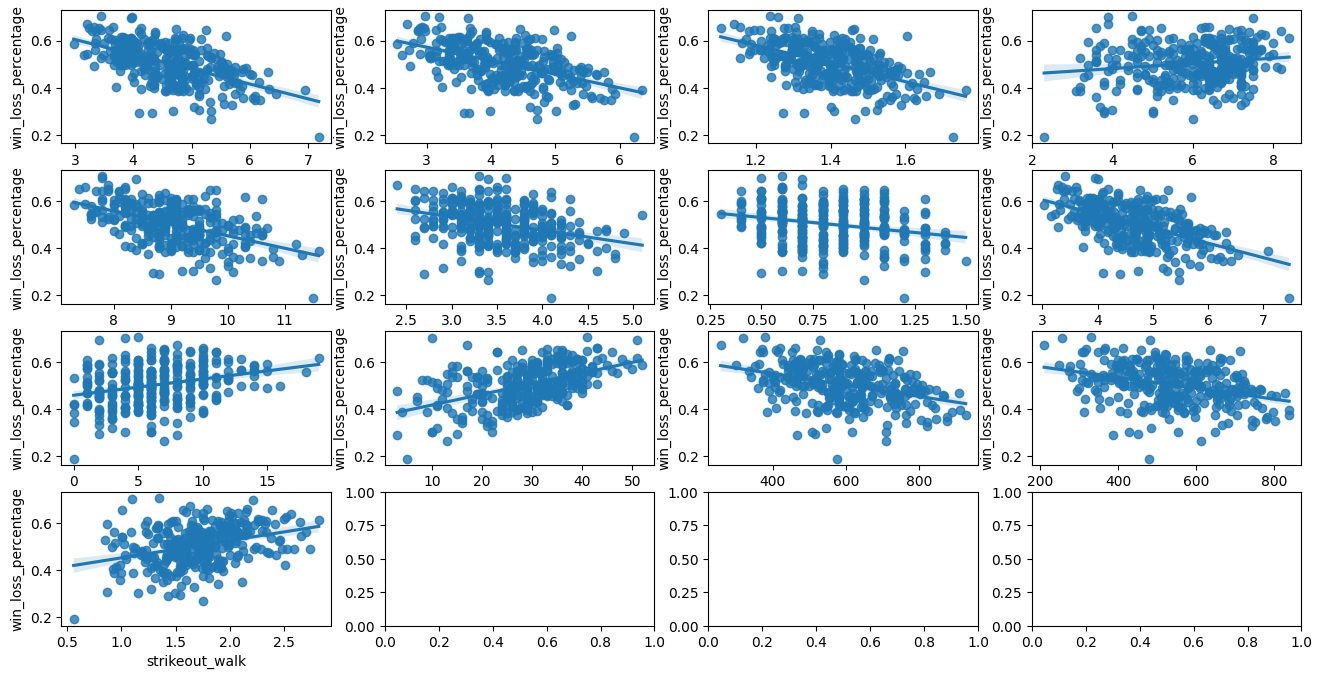

In [40]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=4)
feature = ['runs_per_game', 'ERA', 'WHIP', 'strikeouts_9', 'hits_9', 'walks_9', 'homeruns_9', 'run_average_9', 'shutouts', 'saves', 'runs', 'earned_runs', 'strikeout_walk']
for i, feature in enumerate(feature):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='win_loss_percentage', data=pitching_df, ax=axs[row][col])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# X_features = pitching_df[['runs_per_game', 'ERA', 'WHIP', 'strikeouts_9', 'hits_9', 'walks_9', 'homeruns_9', 'run_average_9', 'shutouts', 'saves', 'runs', 'earned_runs', 'strikeout_walk']]
y_target = pitching_df['win_loss_percentage']
X_features = pitching_df.drop('win_loss_percentage', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_preds = model.predict(X_test)

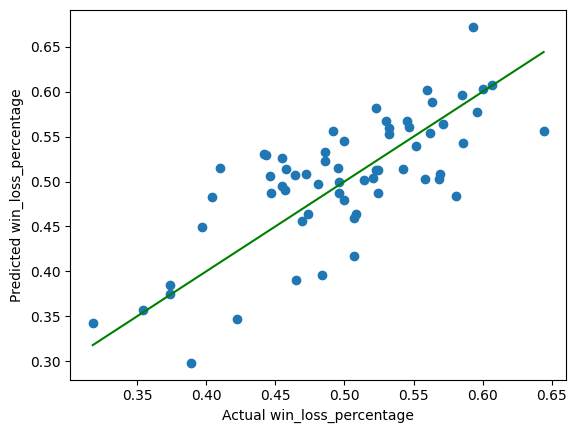

In [11]:
plt.scatter(y_test, y_preds)
plt.xlabel('Actual win_loss_percentage')
plt.ylabel('Predicted win_loss_percentage')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.show()

In [12]:
print(y_preds)

[0.48749366 0.50382447 0.55356247 0.52658255 0.48338055 0.55328586
 0.54484805 0.46337057 0.50288673 0.47906668 0.50168945 0.49535416
 0.49979801 0.52336229 0.39647944 0.50848563 0.58797825 0.50285
 0.5140289  0.56712535 0.41718547 0.44970405 0.48724992 0.67212228
 0.51327718 0.35698216 0.55655306 0.50623083 0.50761118 0.54248969
 0.56018167 0.29837091 0.59632844 0.60337898 0.51525973 0.34220727
 0.51325219 0.6016191  0.57699105 0.51516835 0.34660284 0.55913108
 0.39075392 0.45631701 0.45892577 0.49025305 0.55568631 0.52941042
 0.53952616 0.53068452 0.48708458 0.50837585 0.56705394 0.51380909
 0.38472734 0.37470441 0.48248483 0.564038   0.58211608 0.53235181
 0.60738222 0.49687225 0.46388723]


In [14]:
model.score(X_train, y_train)

0.63953936176334

In [16]:
# 평가 지표 계산
r2 = r2_score(y_test, y_preds)  # R² 스코어
mse = mean_squared_error(y_test, y_preds)  # 평균 제곱 오차

print(f"R² 스코어: {r2}")
print(f"평균 제곱 오차(MSE): {mse}")

R² 스코어: 0.45384344668029186
평균 제곱 오차(MSE): 0.002459282275537166


In [ ]:
y_preds_test = model.predict([['5.39','0.474','5.64','1.571','7.5','4.7','9.5','0.9','5.75','12','36','806','756','1.6']])

In [ ]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [7]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_2 = LogisticRegression()
model_2.fit()